# Prueba el modelo reentrenado con 'Transfer Learning con TF-Hub' para reconocer los Tipos de Flores IRIS 

0) Instalar el paquete:

In [1]:
#@title Instalar paquete

# Luego de instalar el paquete tal vez necesario reiniciar el entorno (ver mensajes que genera)
try:
  # %tensorflow_version only exists in Colab.
  !pip install -q tf-nightly
except Exception:
  pass

!pip install -q -U tf-hub-nightly
!pip install -q tfds-nightly

     |████████████████████████████████| 399.5MB 35kB/s 
     |████████████████████████████████| 471kB 51.2MB/s 
     |████████████████████████████████| 3.8MB 47.0MB/s 
     |████████████████████████████████| 12.2MB 43.9MB/s 
     |████████████████████████████████| 14.5MB 169kB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 112kB 13.3MB/s 
     |████████████████████████████████| 3.7MB 13.4MB/s 


1) Importar librerías:

In [2]:
#@title Librerías a usar

# For running inference on the TF-Hub module.
import tensorflow as tf
import tensorflow_hub as hub

# For downloading the image.
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras import layers
from keras.preprocessing import image
from IPython.display import Image

from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import csv
import os

print("\nLibrerías importadas")


Librerías importadas


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


2) Montar el Drive:

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

# directorio local en Google Drive
path = 'gdrive/My Drive/IA/demo IRIS/'  #@param {type:"string"}

model_export_path = path + '/Model_TFHub'
imagPath = path + '/imagenes/test'

Mounted at /content/gdrive


2) Cargar el modelo ya reentrenado:

In [4]:
#@title Cargar modelo re-entrenado

# importa el modelo reentrenado
classifier = tf.keras.models.load_model(model_export_path)
print("\nModelo recuperado de ", model_export_path)

# define el tamaño de imágenes soportadas
with open( model_export_path + '/imagshape.csv', mode='r') as csvfile:
    aux_imShape = list(csv.reader(csvfile))[0]
IMAGE_SHAPE = [ int(aux_imShape[0]), int(aux_imShape[1]) ] 
print('Tamaño de imágenes: ', IMAGE_SHAPE, ' recuperada')

# importa definición de las clases
with open( model_export_path + '/clases.csv', mode='r') as csvfile:
    all_classes = list(csv.reader(csvfile))[0]
print('Definición de las clases: ', all_classes, ' recuperada')



Modelo recuperado de  gdrive/My Drive/IA/demo IRIS//Model_TFHub
Tamaño de imágenes:  [299, 299]  recuperada
Definición de las clases:  ['Setosa', 'Versicolor', 'Virginica']  recuperada


3) Ejecutar el nuevo modelo re-entrenado sobre las imágenes y mostrar estadísticas:


--- Procesando  setosa


>  gdrive/My Drive/IA/demo IRIS//imagenes/test/setosa/setosa ok-test.jpg :  virginica[0.586507]!


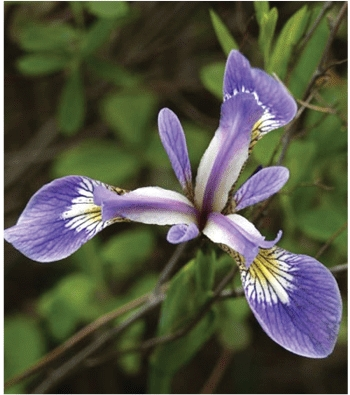

>  gdrive/My Drive/IA/demo IRIS//imagenes/test/setosa/setosa 1-test.jpg :  setosa[0.73320216]


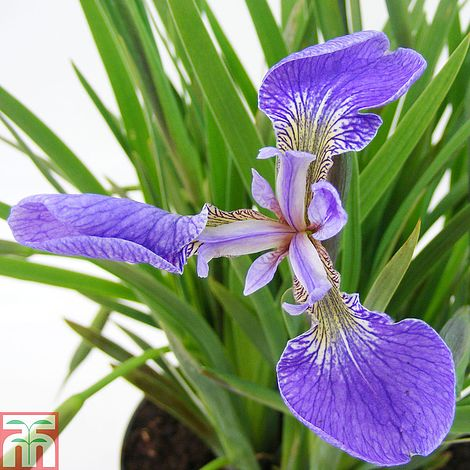

>  gdrive/My Drive/IA/demo IRIS//imagenes/test/setosa/setosa 3-test.jpg :  setosa[0.7061723]


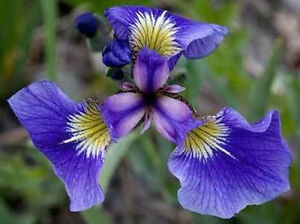


TOTAL CLASS setosa :  3 : Detectado OK  2 imágenes - Detectado con Error  1 imágenes.
con una Exactitud de 0.666667

--------------------------------------------------------------------------------------------------------------- 

--- Procesando  versicolor


>  gdrive/My Drive/IA/demo IRIS//imagenes/test/versicolor/versicolor ok-test.jpg :  virginica[0.5635688]!


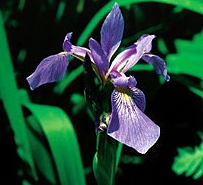

>  gdrive/My Drive/IA/demo IRIS//imagenes/test/versicolor/versicolor 1-test.jpg :  versicolor[0.569936]


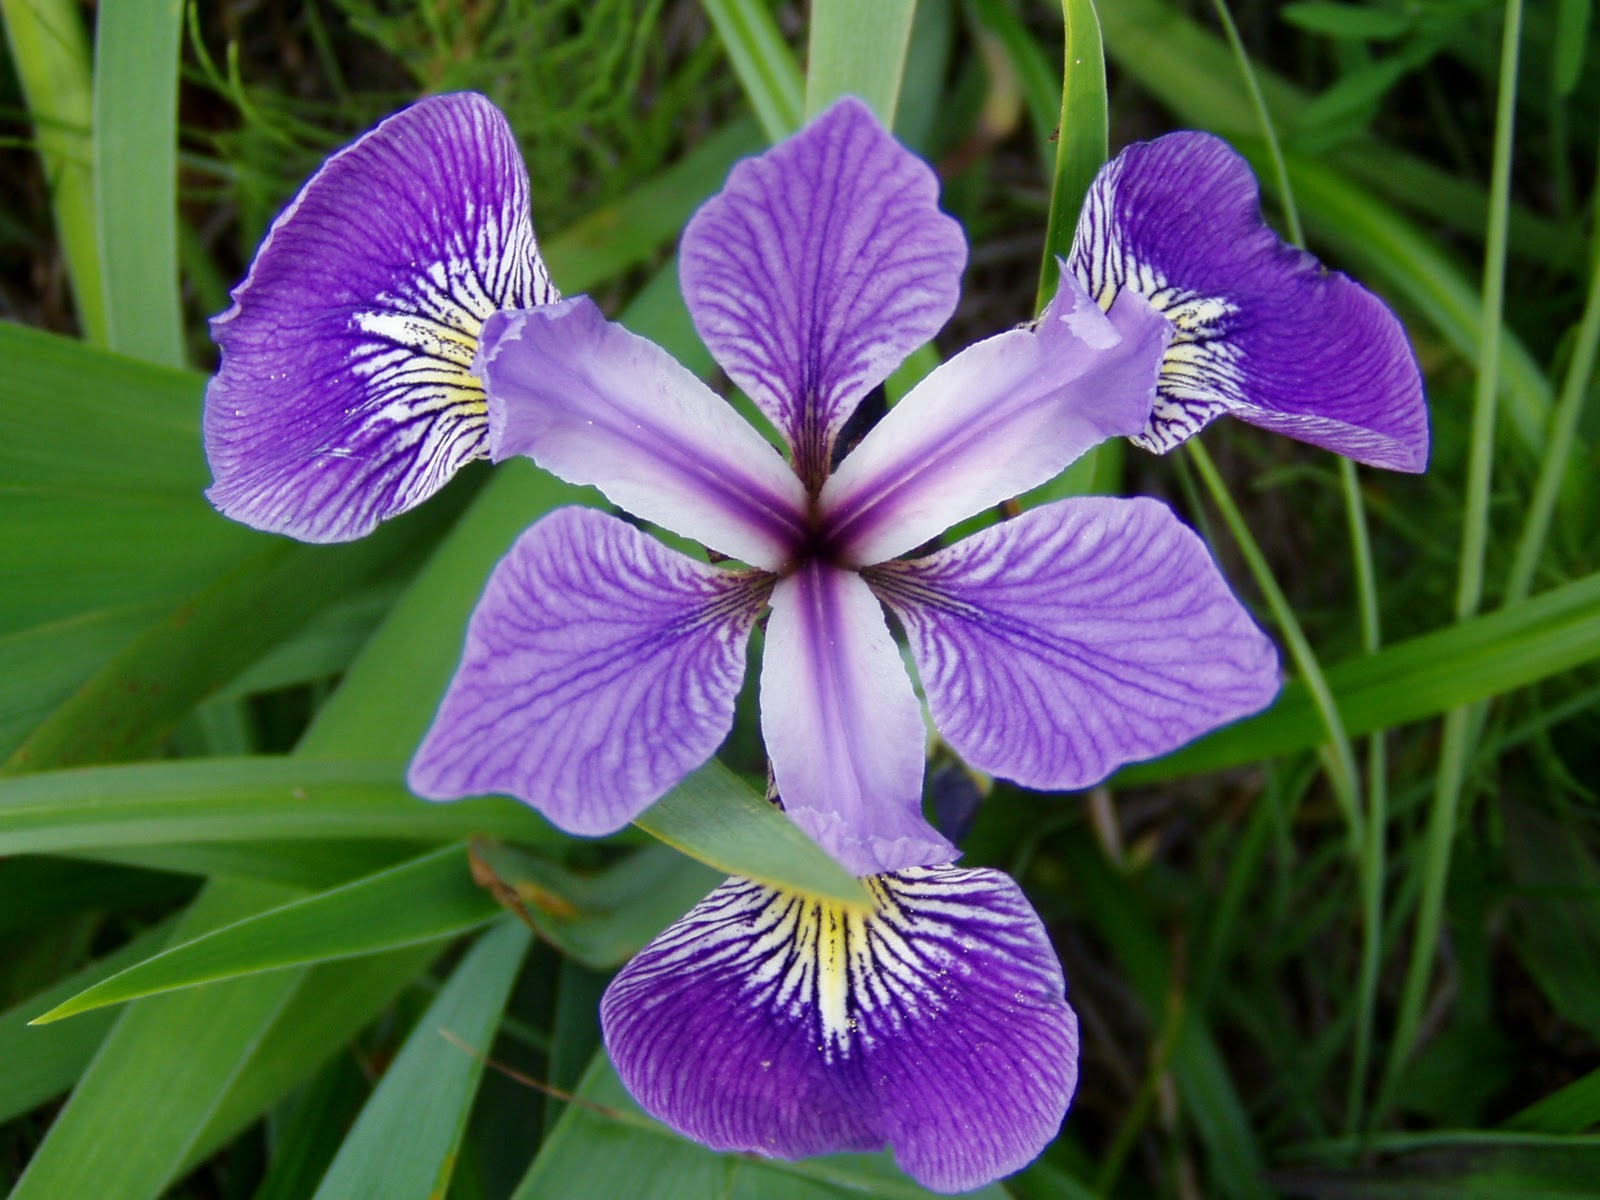

>  gdrive/My Drive/IA/demo IRIS//imagenes/test/versicolor/versicolor 2-test.jpg :  versicolor[0.5100542]


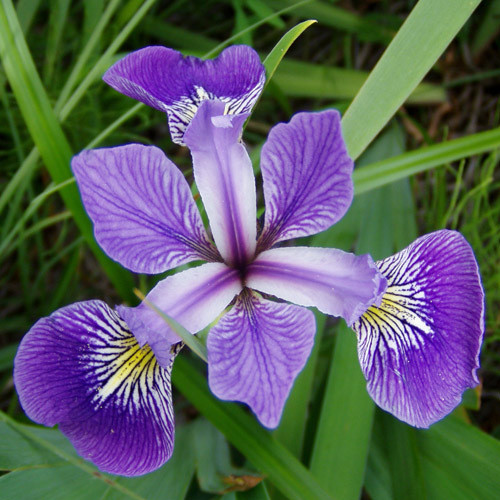


TOTAL CLASS versicolor :  3 : Detectado OK  2 imágenes - Detectado con Error  1 imágenes.
con una Exactitud de 0.666667

--------------------------------------------------------------------------------------------------------------- 

--- Procesando  virginica


>  gdrive/My Drive/IA/demo IRIS//imagenes/test/virginica/virginica ok-test.jpg :  virginica[0.70464987]


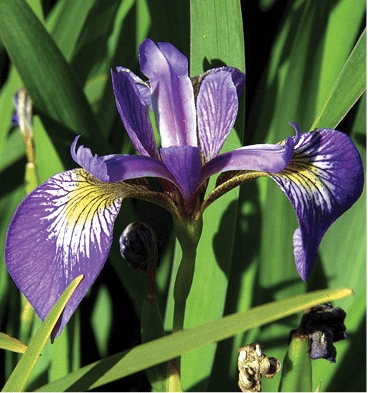

>  gdrive/My Drive/IA/demo IRIS//imagenes/test/virginica/virginica 1-test.jpg :  versicolor[0.57722]!


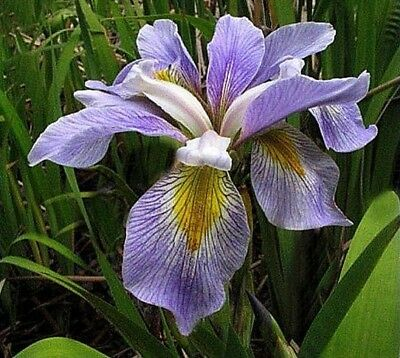

>  gdrive/My Drive/IA/demo IRIS//imagenes/test/virginica/virginica 2-test.jpg :  virginica[0.5496064]


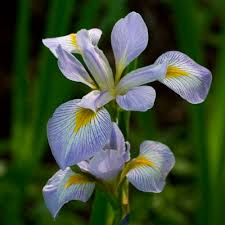


TOTAL CLASS virginica :  3 : Detectado OK  2 imágenes - Detectado con Error  1 imágenes.
con una Exactitud de 0.666667

--------------------------------------------------------------------------------------------------------------- 


= TOTAL GENERAL  9 : Detectado OK  6 imágenes - Detectado con Error  3 imágenes.

= Exactitud: 0.666667

= Matriz de Confusión (real / predecido): 
              p:Setosa  p:Versicolor  p:Virginica
r:Setosa             2             0            1
r:Versicolor         0             2            1
r:Virginica          0             1            2

= Reporte de Clasificación: 
              precision    recall  f1-score   support

      setosa       1.00      0.67      0.80         3
  versicolor       0.67      0.67      0.67         3
   virginica       0.50      0.67      0.57         3

    accuracy                           0.67         9
   macro avg       0.72      0.67      0.68         9
weighted avg       0.72      0.67      0.68         9




In [5]:
#@title Probar modelo re-entrenado con imágenes de prueba

# define función auxiliar para mostrar resultado de cada imágen 
def testImage(file_name, image_sample, classDesired, showPredictOK):
    result = classifier.predict(image_sample)
    
    # identifica mejor
    bestPos = np.argmax(result, axis=1)
    clasPred = str(all_classes[int(bestPos)]).lower()

    prediction = clasPred + "" + str(result[0][bestPos]) + "" 
    if clasPred == classDesired:
      res = True      
    else:
      res = False
      prediction = prediction + "!"

    # muestra resultados (solo con error)
    if ((not res) or showPredictOK):
      print("> ", file_name,": " , prediction)
      img = Image(file_name, width = "100", height = "80")
      display(img)

    return res, clasPred

# define función auxiliar para mostrar resultado de cada directorio
def testAllClass(classDesired):
  cantOK = 0
  cantNOK = 0
  predict_path =  imagPath + '/' + str(classDesired)
  print("\n")
  y_classReal = []
  y_classRes = []
  for file in os.listdir(predict_path):
      if not file.startswith('.'):
          file = predict_path + "/" + file

          image_sample = image.load_img(file, target_size = IMAGE_SHAPE)
          image_sample = image.img_to_array(image_sample)/255
          image_sample = np.expand_dims(image_sample, axis = 0)
          
          result, clRes = testImage(file, image_sample, classDesired, True)
          if (result):
            cantOK = cantOK + 1
          else:
            cantNOK = cantNOK + 1

          y_classReal.append(classDesired)
          y_classRes.append(clRes)

  print("\nTOTAL CLASS", classDesired,": ", cantOK+cantNOK, ": Detectado OK ", cantOK, "imágenes - Detectado con Error ", cantNOK, "imágenes.")  
  print('con una Exactitud de %f' % accuracy_score(y_classReal, y_classRes))

  return cantOK, cantNOK, y_classReal, y_classRes

# procesa las imágenes de la carpeta <Test>
y_tests = []
y_preds = []
okGral = 0 
NokGral = 0
all_dirs = os.listdir(imagPath)
for each_dir in all_dirs:
  if os.path.isdir(  imagPath + '/' + each_dir):
    print("\n--- Procesando ", each_dir)
    ok, nok, tests, preds = testAllClass(each_dir.lower())
    print("\n--------------------------------------------------------------------------------------------------------------- ")  
    okGral = ok + okGral 
    NokGral = nok + NokGral
    y_tests.extend(tests)
    y_preds.extend(preds)

print("\n===========================================================================================================================")
print("\n= TOTAL GENERAL ", okGral+NokGral, ": Detectado OK ", okGral, "imágenes - Detectado con Error ", NokGral, "imágenes.")

print('\n= Exactitud: %f' % accuracy_score(y_tests, y_preds))
  
print("\n= Matriz de Confusión (real / predecido): ")
cm = confusion_matrix(y_tests, y_preds, labels=[s.lower() for s in all_classes])
cmtx = pd.DataFrame(
    cm, 
    index=['r:{:}'.format(x) for x in all_classes], 
    columns=['p:{:}'.format(x) for x in all_classes]
  )
print(cmtx)

print("\n= Reporte de Clasificación: ")
print(classification_report(y_tests, y_preds))

print("\n===========================================================================================================================")
